In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib 
# Import model:
import radiation_model

## Tips: 
include 
```python 
importlib.reload(radiation_model)
```
before you run the model. This will load any changes you make to the script :) 

### Dictionaries:
A dictionary is a very useful python structure where a value/number/object/array can be extracted by a key word. The output from the model comes as a dictionary here. The keywords should be more or less self explanatory, but you can check the script if unsure. 
Example:

In [1]:
age= {'Sara':28, 'Egon':51, 'Sofie':4}
age['Jo']= 63
for key in age.keys():
    print(key + ' has age:')
    print(age[key])
print('Saras age is:')
print(age['Sara'])


Sara has age:
28
Egon has age:
51
Sofie has age:
4
Jo has age:
63
Saras age is:
28


## About the model:
The model is in the script radiation_mode.py. It is structured similarly to your old assignment. You probably want to spend a little time on reading the code and understanding what is going on. 

### Read in input to model:

In [4]:
# Read in input variables:
atmos = pd.read_csv('atmos.csv') # pressure and temperature of standard atmosphere
r_gass = pd.read_csv('r_gass.csv') # Mixing ratios gases
abs_kons = pd.read_csv('abs_kons.csv') # Absorbption constants
emiss = pd.read_csv('emiss.csv') # Emissivity

In [12]:
emiss

,H2O,CO2,O3
0,1.072806e-03,2.719935e-05,1.334649e-07
1,8.398826e-04,1.748748e-05,1.308982e-07
2,6.894122e-04,1.287283e-05,1.284284e-07
3,5.834787e-04,1.017164e-05,1.260501e-07
4,5.050519e-04,8.404373e-06,1.237583e-07
5,4.431993e-04,7.152505e-06,1.215484e-07
6,3.917389e-04,6.218881e-06,1.194159e-07
7,3.486936e-04,5.495660e-06,1.173570e-07
8,3.120639e-04,4.919875e-06,1.153679e-07
9,2.703567e-04,4.450612e-06,1.134451e-07


### Set conditions:

In [4]:
nr_boxes = 50  # antall bokser
dt = 1.  # timestem [h]
n_t = 24  # number of timesteps
dz = 1000.  # thickness of each layer [m]
H_SH = 4000  # skalahøyde SH, [m]
T_s_0 = 288.2  # Surface temp initial value

albedo = 0.3  # Bakkealbedo
In = 10  # langbølget stråling ved 51km [W/m2]
latitude = np.deg2rad(45)  # Latitude in radians
declinationAngle = np.deg2rad(0)  # 0=21 mars
initial_temp = 250.

In [9]:
# Exercise 1
importlib.reload(radiation_model)
model= radiation_model.RadiationModel(nr_boxes, atmos, r_gass, abs_kons, emiss, albedo, declinationAngle, latitude, init_surface_temp=T_s_0, initial_temp=initial_temp)
tau = model.compute_tau()

## Exercise 2: Flux density of short wave radiation

In [6]:
importlib.reload(radiation_model)
model = radiation_model.RadiationModel(nr_boxes, atmos, r_gass, 
                                        abs_kons, emiss, albedo, declinationAngle, latitude, 
                                       init_surface_temp= T_s_0, initial_temp= initial_temp)#, 
output = model.runRadiationModel(n_t, dt,t0=0)

0 of 24
2 of 24
4 of 24
6 of 24
8 of 24
10 of 24
12 of 24
14 of 24
16 of 24
18 of 24
20 of 24
22 of 24


## Overview of outputs:

In [7]:
for key in output.keys():
    if type(output[key])==dict:
        print('%s contains:' %key)
        print(list(output[key].keys()))
    else:
        print('%s is array' %key)

SW_down contains:
['H2O_1', 'H2O_2', 'H2O_3', 'O3_Hartley', 'O3_Huggins', 'O3_Chappuis']
DeltaF_SW_down contains:
['H2O_1', 'H2O_2', 'H2O_3', 'O3_Hartley', 'O3_Huggins', 'O3_Chappuis']
mu is array
SW_heating_rates contains:
['H2O_1', 'H2O_2', 'H2O_3', 'O3_Hartley', 'O3_Huggins', 'O3_Chappuis', 'H2O_tot', 'O3_tot', 'SW_tot']
LW_up contains:
['H2O', 'O3', 'CO2']
LW_down contains:
['H2O', 'O3', 'CO2', 'Surface']
LW_heating_rates contains:
['H2O', 'O3', 'CO2', 'LW_tot']
T is array
T_s is array
DeltaF_LW_total contains:
['H2O', 'O3', 'CO2']
DeltaF_LW_down contains:
['H2O', 'O3', 'CO2']
DeltaF_LW_up contains:
['H2O', 'O3', 'CO2']
SH_heating_rate is array
heating_rates_total is array


## Heating rates

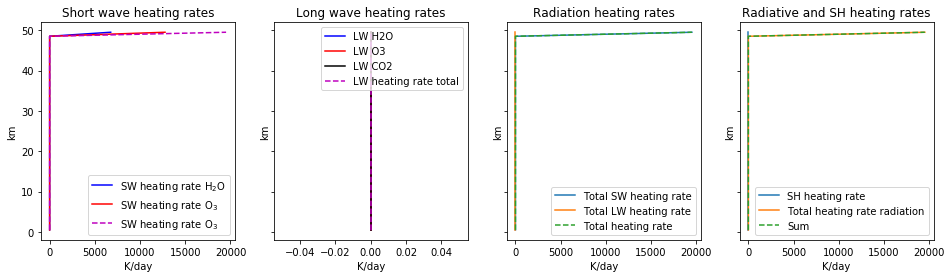

In [8]:
# Multiply by 24 (K/h--> K/day), avg over last 24 h (pick out [:,-24:])
colors={'CO2':'k', 'H2O':'b', 'O3':'r'}
fig, axs = plt.subplots(1,4, sharey=True, figsize=[16,4])
axs[0].plot(24*np.mean(output['SW_heating_rates']['H2O_tot'][:,-24:], axis=1), model.z*1e-3, c=colors['H2O'], label='SW heating rate H$_2$O')#", xlabel='K/h')#['SyntaxWarning'])
axs[0].plot(24*np.mean(output['SW_heating_rates']['O3_tot'][:,-24:], axis=1), model.z*1e-3, c= colors['O3'], label = 'SW heating rate O$_3$')#", xlabel='K/h')#['SyntaxWarning'])
axs[0].plot(24*np.mean(output['SW_heating_rates']['SW_tot'][:,-24:], axis=1), model.z*1e-3,'--',c='m', label = 'SW heating rate O$_3$')#", xlabel='K/h')#['SyntaxWarning'])
axs[0].set(xlabel='K/day', ylabel='km', title='Short wave heating rates')
axs[0].legend()
for band in radiation_model.LW_bands:
    axs[1].plot(24*np.mean(output['LW_heating_rates'][band][:,-24:], axis=1), model.z*1e-3, c=colors[band], label = 'LW %s' %band)#", xlabel='K/h')#['SyntaxWarning'])
axs[1].plot(24*np.mean(output['LW_heating_rates']['LW_tot'][:,-24:], axis=1), model.z*1e-3,'--',c='m', label = 'LW heating rate total')#", xlabel='K/h')#['SyntaxWarning'])
axs[1].set(xlabel='K/day', ylabel='km', title='Long wave heating rates')#, legend=True)
axs[1].legend()

axs[2].plot(24*np.mean(output['SW_heating_rates']['SW_tot'][:,-24:], axis=1), model.z*1e-3, label='Total SW heating rate')#", xlabel='K/h')#['SyntaxWarning'])
axs[2].plot(24*np.mean(output['LW_heating_rates']['LW_tot'][:,-24:], axis=1), model.z*1e-3, label='Total LW heating rate')#", xlabel='K/h')#['SyntaxWarning'])
axs[2].plot(24*np.mean(output['heating_rates_total'][:,-24:], axis=1), model.z*1e-3,'--', label='Total heating rate')
axs[2].set(xlabel='K/day', ylabel='km', title='Radiation heating rates')#, legend=True)
axs[2].legend()
axs[3].plot(24*np.mean(output['SH_heating_rate'][:,-24:], axis=1), model.z*1e-3, label='SH heating rate')
axs[3].plot(24*np.mean(output['heating_rates_total'][:,-24:], axis=1), model.z*1e-3, label='Total heating rate radiation')
axs[3].plot(24*np.mean(output['SH_heating_rate'][:,-24:], axis=1)+24*np.mean(output['heating_rates_total'][:,-24:], axis=1), model.z*1e-3,'--', label='Sum')
axs[3].set(xlabel='K/day', ylabel='km', title='Radiative and SH heating rates')#, legend=True)
axs[3].legend()
plt.show()